# 📊 AI Job Trends EDA
Exploratory Data Analysis on AI-related Job Dataset

## 📦 Step 1: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid')
%matplotlib inline

## 📥 Step 2: Load Dataset

In [3]:
df = pd.read_csv('ai_job_trends_dataset.csv')
df.head()

Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342                  55.96   
1                 1243                       6205                  16.81   
2                 3338                       1154                  91.82   
3                 7173                       4060                   1.89   
4                 5944                       7396                  53.76   

   Automation Risk (%)   Location  Gender Diversity (%)  
0                28.28         UK                 44.63  
1                89.71        USA                 66.39  
2                72.97     Canada                 41.13  
3                99.94  Australia                 65.76  
4                37.65    Germany                 72.57

## 🔍 Step 3: Basic Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [5]:
# Missing values
df.isnull().sum()

Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64

## 🔢 Step 4: Top Job Titles and Industries

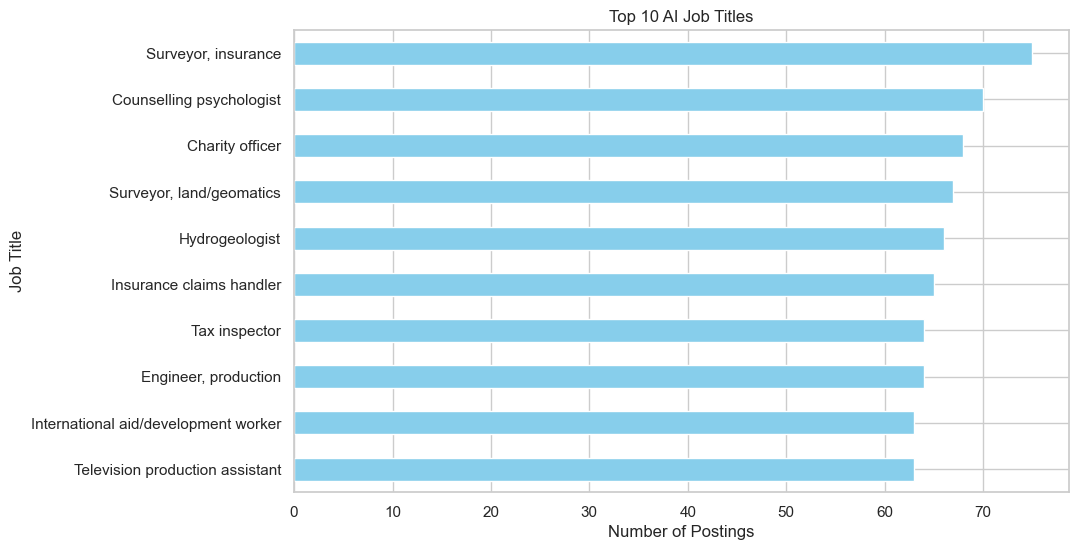

In [6]:
# Top 10 Job Titles
df['Job Title'].value_counts().head(10).plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Top 10 AI Job Titles')
plt.xlabel('Number of Postings')
plt.gca().invert_yaxis()
plt.show()

C:\Users\opscs\AppData\Local\Temp\ipykernel_3532\1532413130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='viridis')


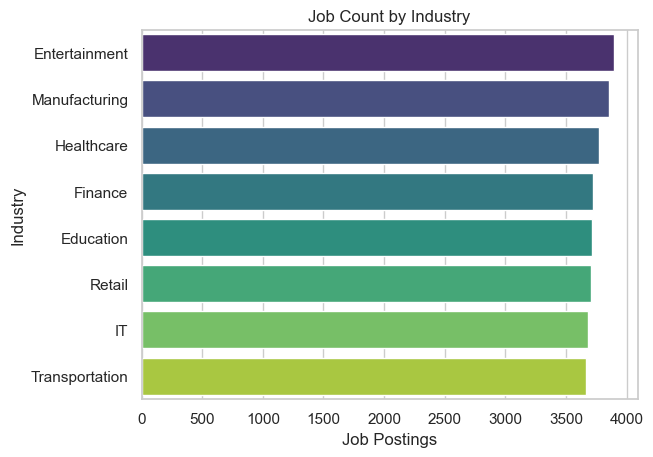

In [7]:
# Industries
industry_counts = df['Industry'].value_counts()
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='viridis')
plt.title('Job Count by Industry')
plt.xlabel('Job Postings')
plt.ylabel('Industry')
plt.show()

## 🔢 Step 5: Job Openings: 2024 vs. 2030

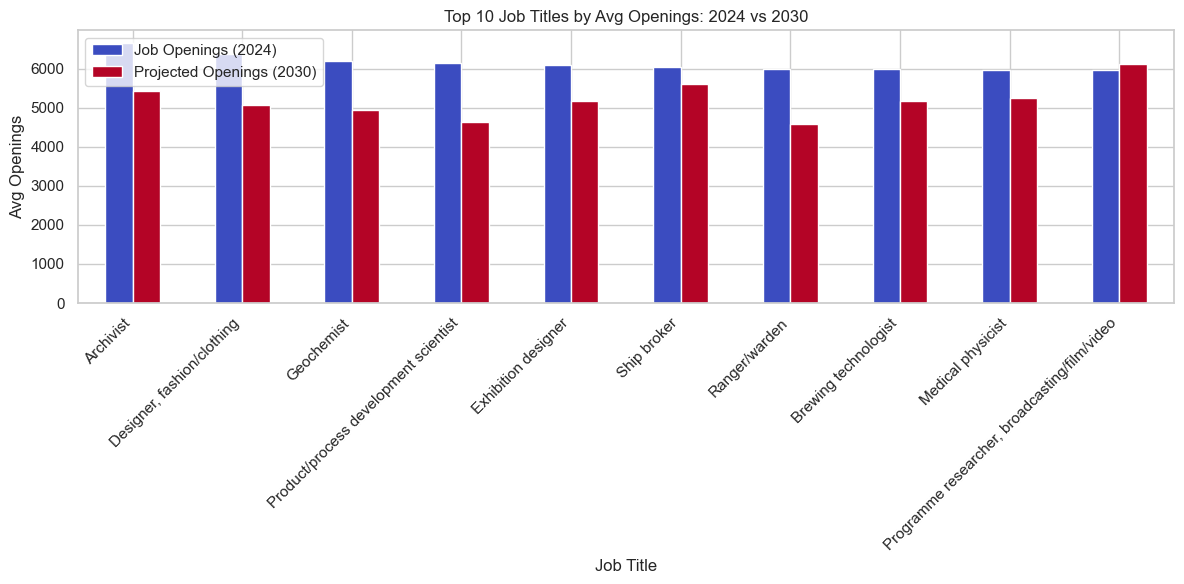

In [8]:
# Aggregate average openings per job title
job_openings = df.groupby("Job Title")[["Job Openings (2024)", "Projected Openings (2030)"]].mean().sort_values(by="Job Openings (2024)", ascending=False).head(10)

# Plot as grouped bar chart
job_openings.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title("Top 10 Job Titles by Avg Openings: 2024 vs 2030")
plt.ylabel("Avg Openings")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔢 Step 6:Salary Distribution by Education Level

C:\Users\opscs\AppData\Local\Temp\ipykernel_3532\3656990531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Required Education", y="Median Salary (USD)", palette="Set2")


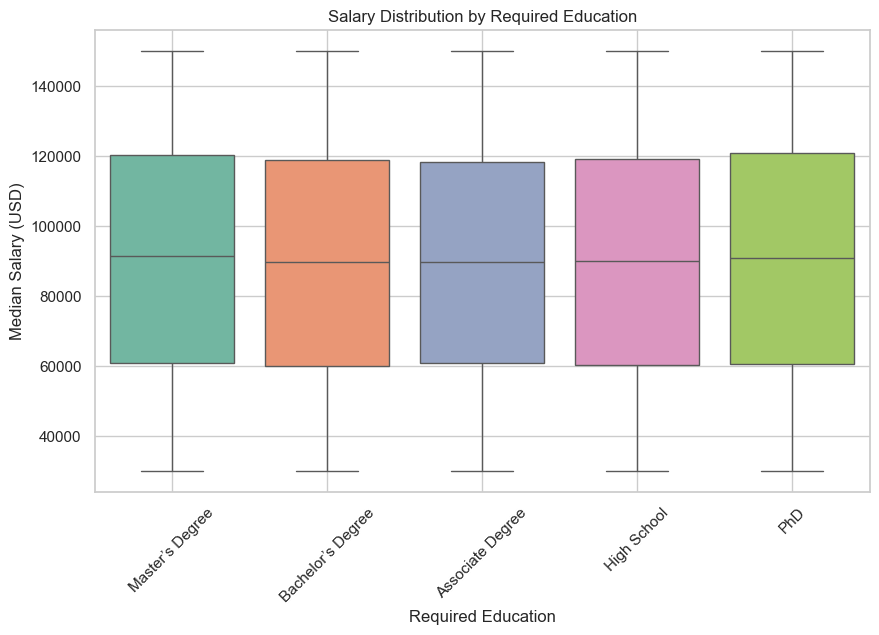

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Required Education", y="Median Salary (USD)", palette="Set2")
plt.title("Salary Distribution by Required Education")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 🔢 Step 7: Automation Risk vs Median Salary

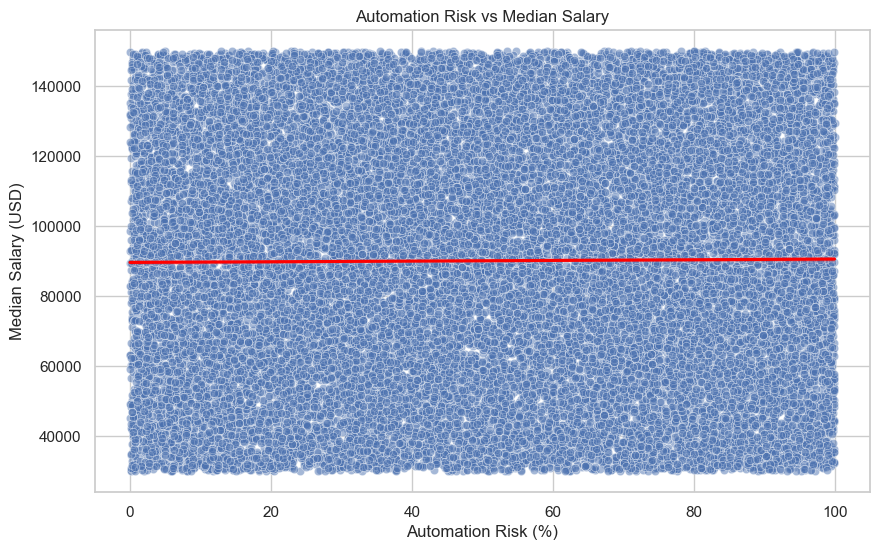

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Automation Risk (%)", y="Median Salary (USD)", alpha=0.5)
sns.regplot(data=df, x="Automation Risk (%)", y="Median Salary (USD)", scatter=False, color='red')
plt.title("Automation Risk vs Median Salary")
plt.grid(True)
plt.show()

✅ A downward red line would suggest higher-paying jobs are safer from automation.

In [11]:
fig = px.scatter(
    df, 
    x="Automation Risk (%)", 
    y="Median Salary (USD)", 
    color="AI Impact Level",
    hover_data=["Job Title", "Industry"],
    title="Automation Risk vs Median Salary (Interactive)"
)
fig.show()

## Step 8: 📊 Gender Diversity Heatmap

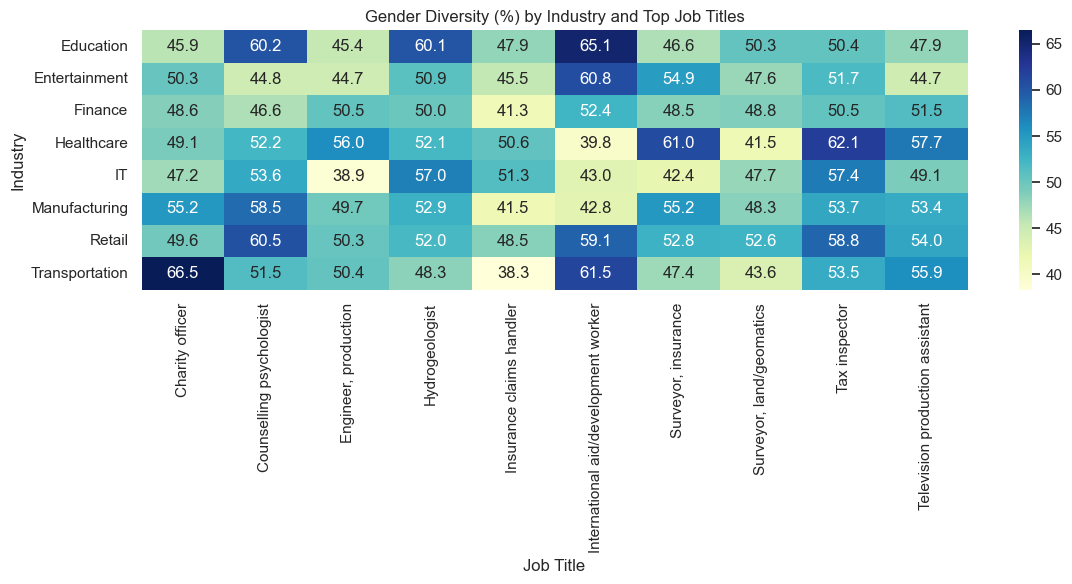

In [12]:
# Select top 10 most frequent job titles
top_titles = df['Job Title'].value_counts().head(10).index
filtered_df = df[df['Job Title'].isin(top_titles)]

# Pivot table
pivot2 = filtered_df.pivot_table(
    index="Industry",
    columns="Job Title",
    values="Gender Diversity (%)",
    aggfunc="mean"
)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot2, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Gender Diversity (%) by Industry and Top Job Titles")
plt.ylabel("Industry")
plt.xlabel("Job Title")
plt.tight_layout()
plt.show()
